## **Predicting Loan Payback**

- This project is a `kaggle` competition task that aims on predicting loan payback. It checks if the loan borrowed will be returned or not.
- I will be doing EDA, Data Preprocessing, training the model and giving report.


In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

**Loading the dataset...**

In [2]:
zip_path = r"C:\Users\Welcome Sir\Downloads\playground-series-s5e11.zip"

with ZipFile(zip_path, "r") as zip_ref:
    zip_ref.printdir()

File Name                                             Modified             Size
sample_submission.csv                          2025-10-28 23:08:48      2291139
test.csv                                       2025-10-28 23:08:48     23021430
train.csv                                      2025-10-28 23:08:50     55988519


In [3]:
# Loading the "test" and "train" data

with ZipFile(zip_path) as z:
    with z.open('train.csv') as f:
        train_data = pd.read_csv(f)
        print("\nTrain data successfully loaded...")
        
    with z.open('test.csv') as f:
        test_data = pd.read_csv(f)
        print("\nTest data successfully loaded...")


Train data successfully loaded...

Test data successfully loaded...


**Preliminary Data Analysis and Cleaning**

In [4]:
# Let's copy the file into df
df = train_data.copy()

# Display the first 6 rows
print("\nDisplaying the first 6 rows:\n")
df.head(6)


Displaying the first 6 rows:



,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0
5,5,44940.30,0.058,653,12159.92,12.24,Male,Single,Bachelor's,Employed,Other,D1,1.0


In [5]:
# Checking for the dataset shape
print("\nChecking for the shape of data:")
rows, columns = df.shape
print("Number of rows:",rows)
print("Number of columns:",columns)


Checking for the shape of data:
Number of rows: 593994
Number of columns: 13


In [6]:
# Checking for missing values
missing_values = df.isna().sum()
if missing_values.sum() > 0:
    print(f"The number of missing values: {missing_values}")
else:
    print("No missing values in the data. Hence, nothing to handle.")


No missing values in the data. Hence, nothing to handle.


In [7]:
# Check for duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(df)) * 100:.2f}%")
else:
    print("No duplicates found in the data.")

No duplicates found in the data.


In [8]:
# Getting the description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,593994.0,296996.500000,171471.442236,0.000,148498.250,296996.500,445494.750,593993.000
annual_income,593994.0,48212.202976,26711.942078,6002.430,27934.400,46557.680,60981.320,393381.740
debt_to_income_ratio,593994.0,0.120696,0.068573,0.011,0.072,0.096,0.156,0.627
credit_score,593994.0,680.916009,55.424956,395.000,646.000,682.000,719.000,849.000
loan_amount,593994.0,15020.297629,6926.530568,500.090,10279.620,15000.220,18858.580,48959.950
interest_rate,593994.0,12.356345,2.008959,3.200,10.990,12.370,13.680,20.990
loan_paid_back,593994.0,0.798820,0.400883,0.000,1.000,1.000,1.000,1.000


**Exploratory Data Analysis**

In [9]:
# Let's separate our columns to numerical and categorical.

num_col = df.select_dtypes(include=["number"]).columns
print(num_col)

cat_col = df.select_dtypes(include=["object"]).columns
print(f"\n{cat_col}")



Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'loan_paid_back'],
      dtype='object')

Index(['gender', 'marital_status', 'education_level', 'employment_status',
       'loan_purpose', 'grade_subgrade'],
      dtype='object')


In [10]:
# I want to perform the description on the categorical features as well.
for col in cat_col:
    print("Feature:", col)
    print("-------------------------")
    print(df[col].value_counts())
    print("")

Feature: gender
-------------------------
gender
Female    306175
Male      284091
Other       3728
Name: count, dtype: int64

Feature: marital_status
-------------------------
marital_status
Single      288843
Married     277239
Divorced     21312
Widowed       6600
Name: count, dtype: int64

Feature: education_level
-------------------------
education_level
Bachelor's     279606
High School    183592
Master's        93097
Other           26677
PhD             11022
Name: count, dtype: int64

Feature: employment_status
-------------------------
employment_status
Employed         450645
Unemployed        62485
Self-employed     52480
Retired           16453
Student           11931
Name: count, dtype: int64

Feature: loan_purpose
-------------------------
loan_purpose
Debt consolidation    324695
Other                  63874
Car                    58108
Home                   44118
Education              36641
Business               35303
Medical                22806
Vacation           

In [11]:
# Here, I will be using histograms and box plots on visualizing the numerical features only while using scatter plots on categorical features

def numerical_relationship(data, column):
    # Stating the figure size
    plt.figure(figsize=(12,6))
    print("Visual Distribution of the Numerical Features")
    
    # Plotting Histogram
    plt.subplot(1,2,1)
    sns.histplot(data=df, x= df[column], kde=True, bins=30)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    # Plotting Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=df, x=df[column])
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Skewness of {column} is: {df[column].skew():.3f}\n")


Visual Distribution of the Numerical Features


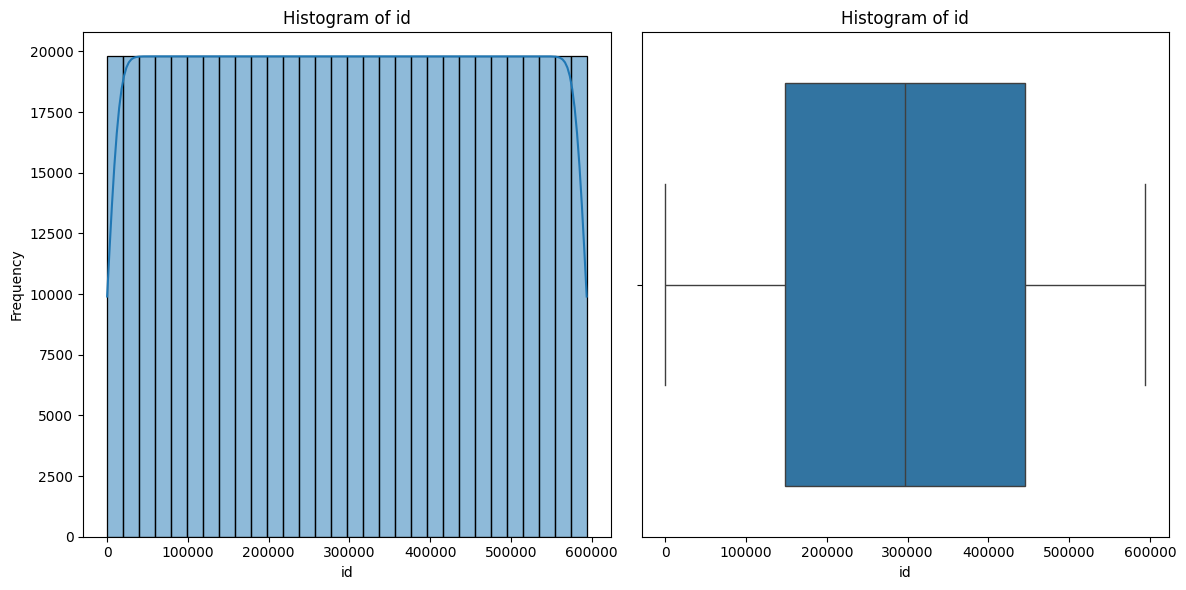

Skewness of id is: 0.000

Visual Distribution of the Numerical Features


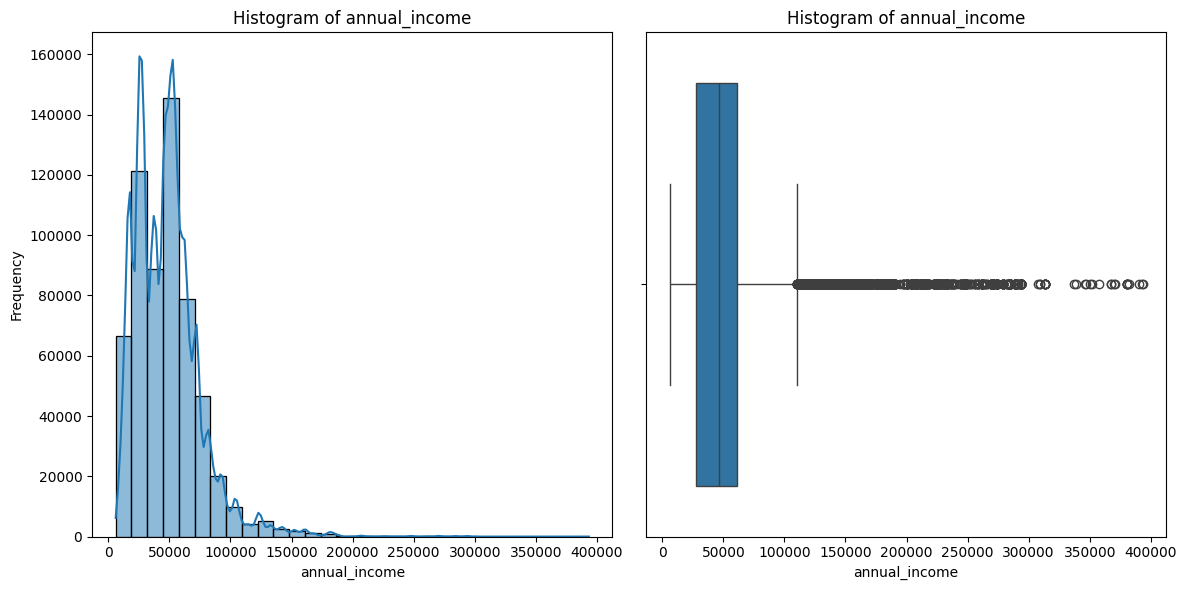

Skewness of annual_income is: 1.720

Visual Distribution of the Numerical Features


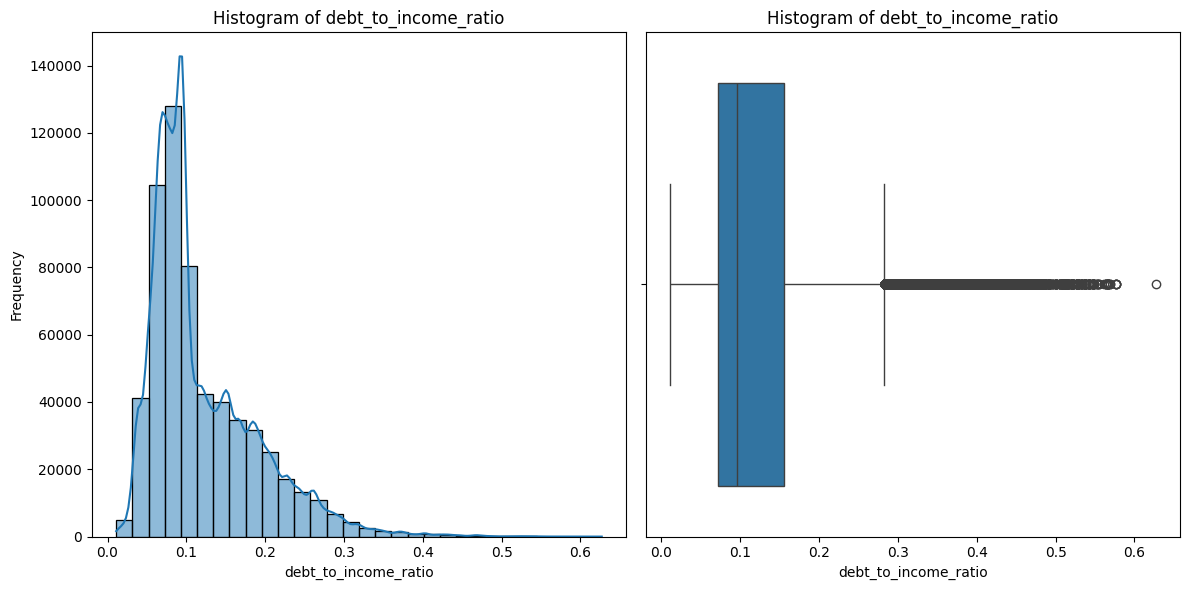

Skewness of debt_to_income_ratio is: 1.407

Visual Distribution of the Numerical Features


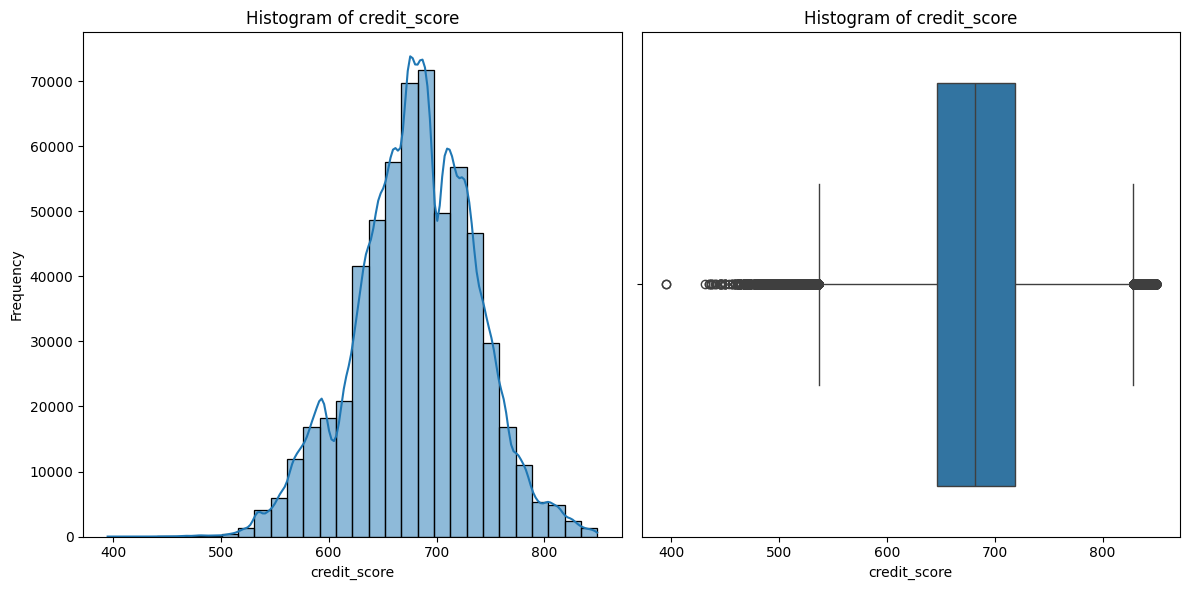

Skewness of credit_score is: -0.167

Visual Distribution of the Numerical Features


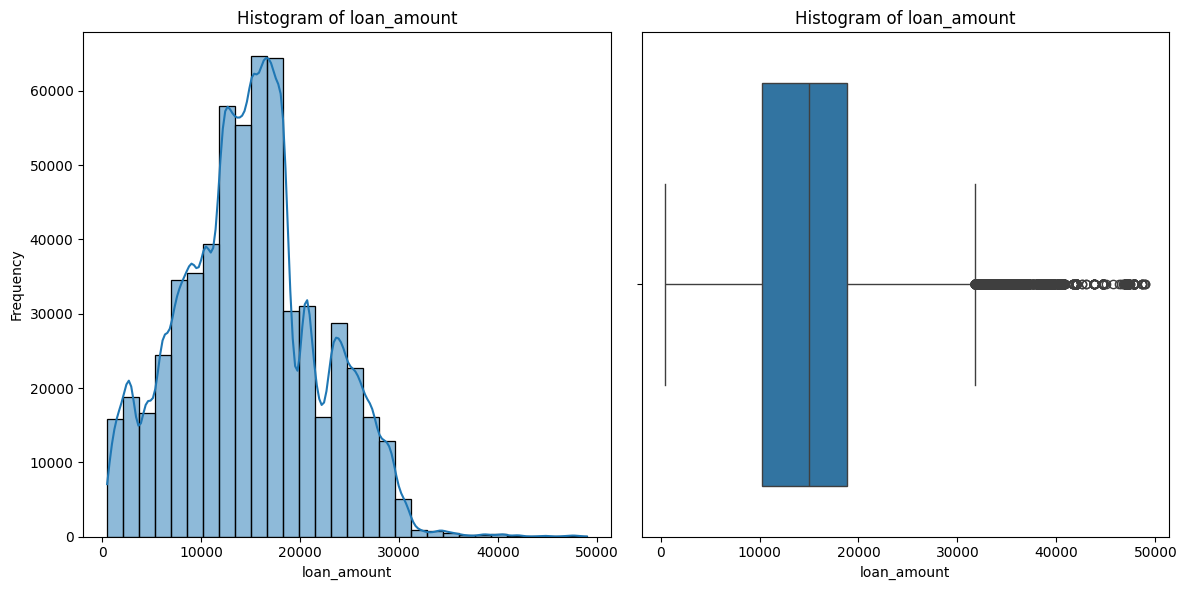

Skewness of loan_amount is: 0.207

Visual Distribution of the Numerical Features


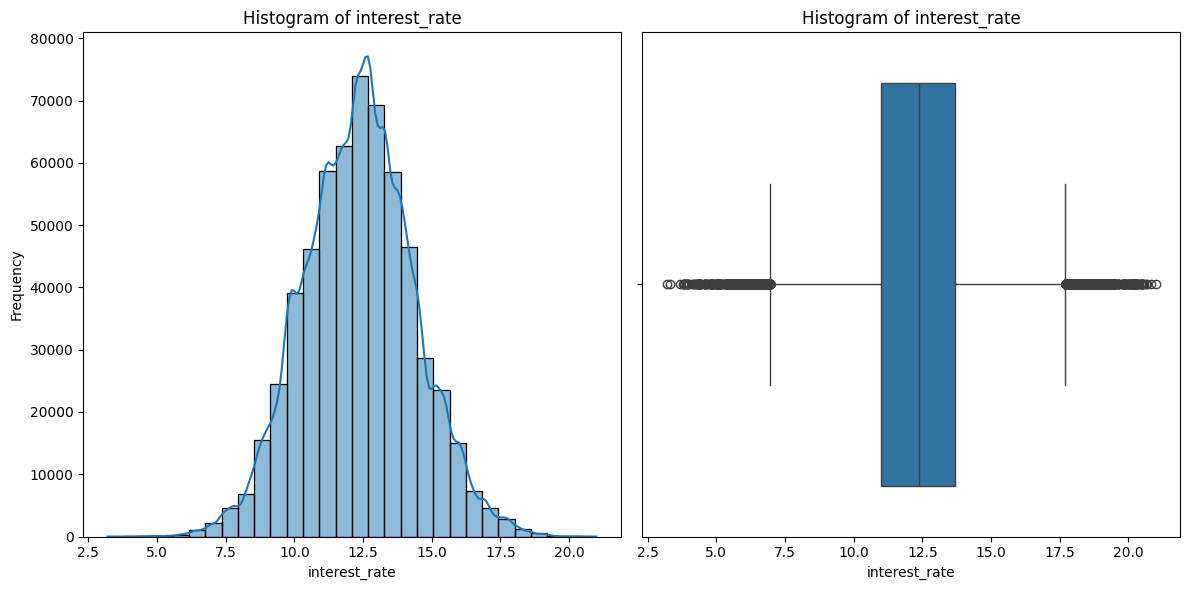

Skewness of interest_rate is: 0.050

Visual Distribution of the Numerical Features


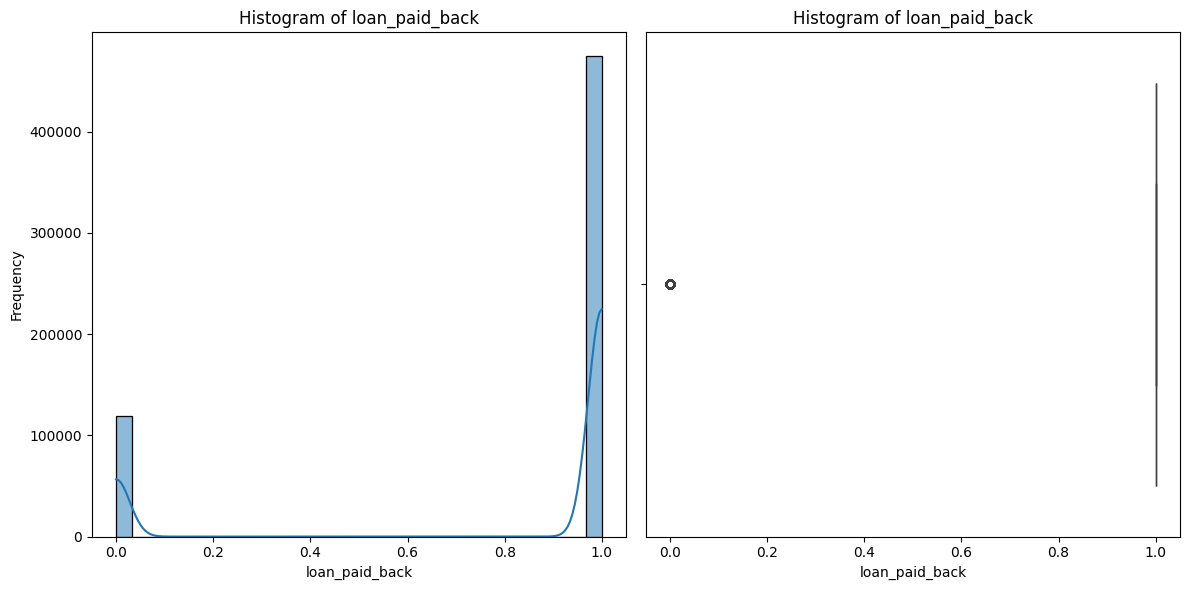

Skewness of loan_paid_back is: -1.491



In [12]:
for col in num_col:
    numerical_relationship(df, col)

From the above `EDA`, there are `right skewed` and `left skewed` observed. Hence, `Power transformation` is recommended